<a href="https://colab.research.google.com/github/swathi156/swathi156/blob/main/hypofinaloutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import files
uploaded = files.upload()


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Loading data as dataframe
#df = pd.read_csv(r"https://raw.githubusercontent.com/Sunita778/Thyroid-Disease-Detection/main/hypothyroid.csv")
df = pd.read_csv(r"/content/hypothyroid.csv")

In [4]:
#reading first 5 row of dataframe
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [5]:
#Checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
#Create a copy for better practice
data = df.copy()

In [7]:
#Shape of the data
data.shape


(3772, 30)

In [8]:
# Display all Columns
data.columns


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [9]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [10]:
#Checking for null values
data.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [11]:

data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [12]:
#Checking for unique values in class column

data['Class'].unique()


array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [13]:
#

n = len(data[data['Class'] == 'secondary_hypothyroid'])
print("No of secondary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'primary_hypothyroid'])
print("No of primary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n)

No of secondary_hypothyroid in Dataset: 2
No of primary_hypothyroid in Dataset: 95
No of compensated_hypothyroid in Dataset: 194
No of negative in Dataset: 3481


In [14]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex ---> ['F' 'M' '?']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['f' 't']
on_antithyroid_medication ---> ['f' 't']
sick ---> ['f' 't']
pregnant ---> ['f' 't']
thyroid_surgery ---> ['f' 't']
I131_treatment ---> ['f' 't']
query_hypothyroid ---> ['f' 't']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['f' 't']
goitre ---> ['f' 't']
tumor ---> ['f' 't']
hypopituitary ---> ['f' 't']
psych ---> ['f' 't']
TSH_measured ---> ['t' 'f']
TSH ---> ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' 

In [15]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 3308
No.of t value in on_thyroxine column : 464 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 3722
No.of t value in query_on_thyroxine column : 50 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 3729
No.of t value in on_antithyroid_medication column : 43 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 3625
No.of t value in sick column : 147 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 3719
No.of t value in pregnant column : 53 
 ---------------------------------

In [16]:
#Checking for '?' value in our data which are null values

data.isin(['?']).sum()

,0
age,1
sex,150
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [17]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

data = data.drop(['TBG'], axis=1)

In [18]:
data[['T4U_measured','T4U']]

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [19]:
## Let's drop some unnecessary columns

data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [20]:
# Now let's replace the '?' values with nan value

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count!=0:
        data[col] = data[col].replace('?',np.nan)

In [21]:
# For rechecking

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [22]:
#Now ? is replaced with nan value. so checking for null value
data.isna().sum()

,0
age,1
sex,150
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [23]:
#Now checking for datatypes of columns

data.dtypes

,0
age,object
sex,object
on_thyroxine,object
query_on_thyroxine,object
on_antithyroid_medication,object
sick,object
pregnant,object
thyroid_surgery,object
I131_treatment,object
query_hypothyroid,object


In [24]:
# Mapping the categorical column

data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [25]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

In [26]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [27]:
#Unique values of referral_source column

data['referral_source'].unique()


array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [ ]:
# @title
# using one-hot-encoding

data = pd.get_dummies(data, columns=['referral_source'], drop_first=True)

In [28]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [29]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [31]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,SVHC,1
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,other,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,other,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,other,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,SVI,1


In [64]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Encode non-numeric columns
label_encoders = {}
for col in data.select_dtypes(exclude=['number']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values with KNN
imputer = KNNImputer(n_neighbors=3, weights='uniform', missing_values=np.nan)
new_array = imputer.fit_transform(data)

# Convert imputed array back to DataFrame
new_data = pd.DataFrame(np.round(new_array), columns=data.columns)

print(new_data.head())


    age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0  34.0  0.0           0.0                 0.0                        0.0   
1  15.0  0.0           0.0                 0.0                        0.0   
2  40.0  1.0           0.0                 0.0                        0.0   
3  67.0  0.0           1.0                 0.0                        0.0   
4  67.0  0.0           0.0                 0.0                        0.0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0   0.0       0.0              0.0             0.0                0.0   
1   0.0       0.0              0.0             0.0                0.0   
2   0.0       0.0              0.0             0.0                0.0   
3   0.0       0.0              0.0             0.0                0.0   
4   0.0       0.0              0.0             0.0                0.0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych    TSH  \
0                 0.

In [33]:
new_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,27.0,28.0,72.0,10.0,1.0,1.0
1,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,22.0,3.0,146.0,234.0,4.0,1.0
2,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,69.0,10.0,48.0,22.0,4.0,1.0
3,67.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,20.0,83.0,146.0,234.0,4.0,1.0
4,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,12.0,201.0,44.0,199.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,287.0,69.0,241.0,146.0,234.0,4.0,1.0
3768,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,23.0,27.0,66.0,16.0,3.0,1.0
3769,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,218.0,19.0,14.0,65.0,6.0,4.0,1.0
3770,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,22.0,222.0,51.0,219.0,3.0,1.0


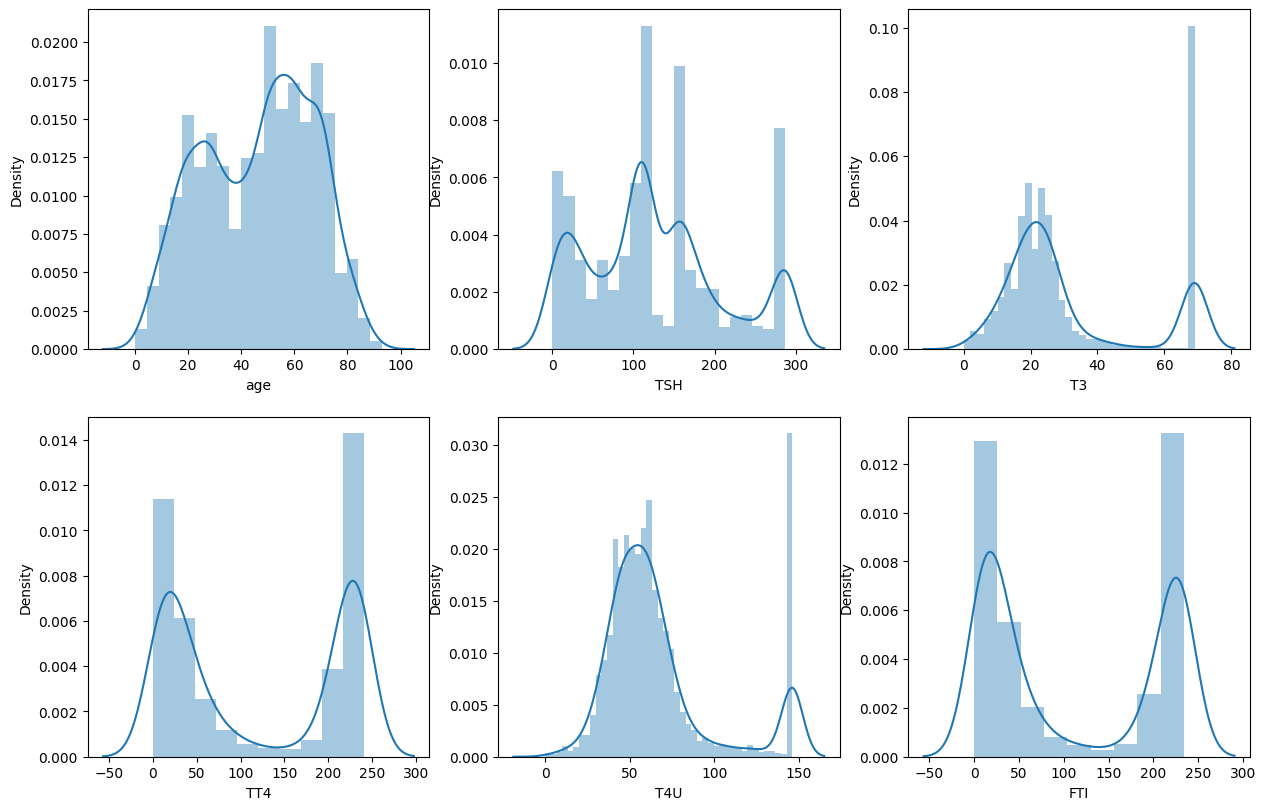

In [34]:
## For checking the distribution for our continuous data in the dataset.


columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

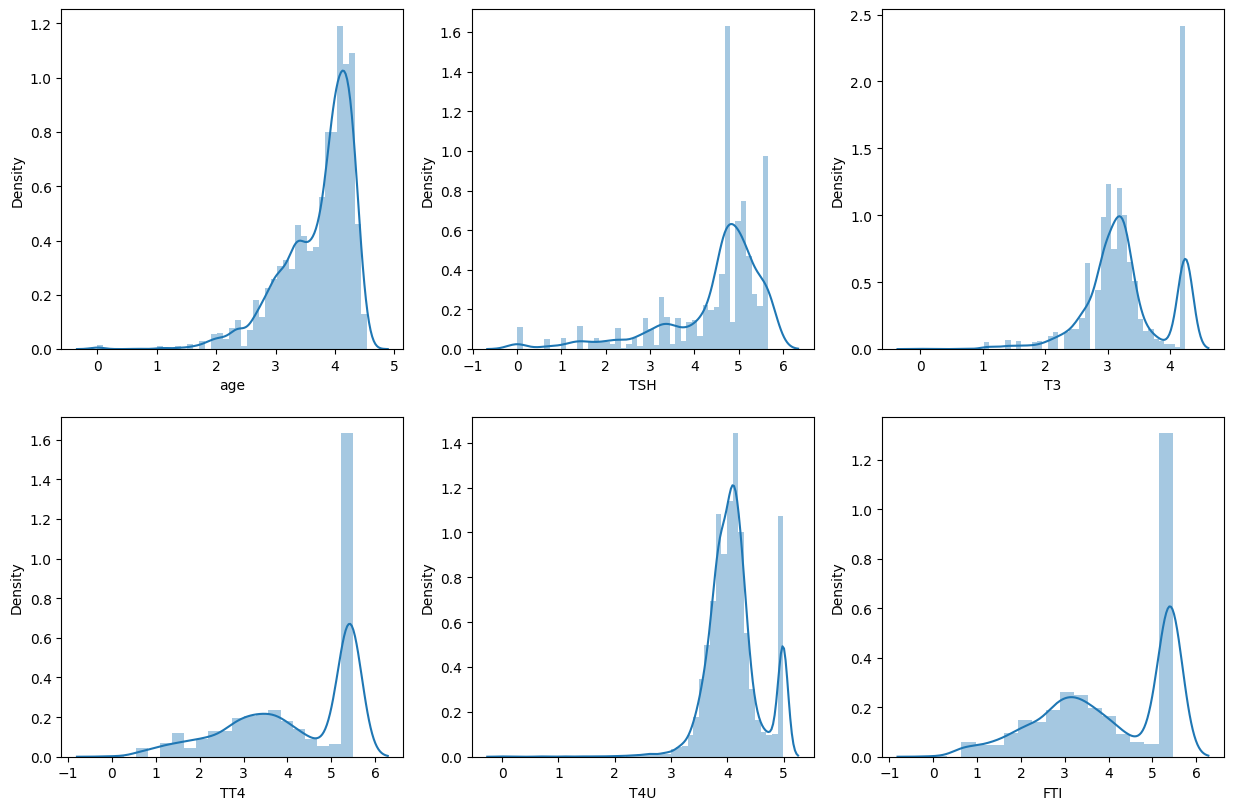

In [35]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [36]:
new_data = new_data.drop(['TSH'], axis = 1)

<Axes: xlabel='Class', ylabel='count'>

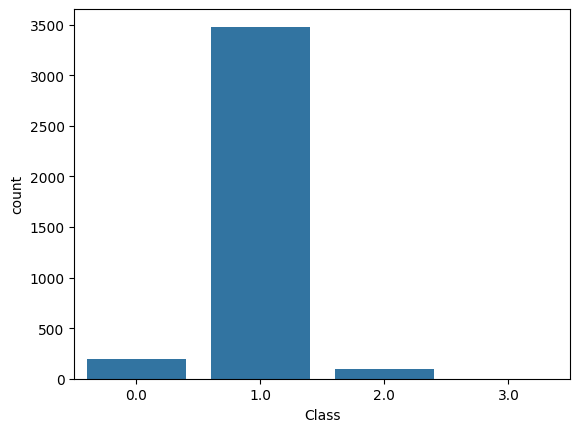

In [37]:
#countplot of class column to see the distribution
sns.countplot(data=new_data, x= 'Class')

In [38]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [39]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
rdsample=RandomOverSampler()

rdsample = RandomOverSampler()
x_sampled, y_sampled = rdsample.fit_resample(x, y)


In [40]:
#Checking for shape of x_sample
x_sampled.shape

(13924, 21)

In [41]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source
0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,29.0,73.0,11.0,1.0
1,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,147.0,235.0,4.0
2,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,11.0,49.0,23.0,4.0
3,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,84.0,147.0,235.0,4.0
4,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,202.0,45.0,200.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,128.0,147.0,235.0,4.0
13920,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,128.0,147.0,235.0,4.0
13921,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,187.0,47.0,182.0,4.0
13922,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,187.0,47.0,182.0,4.0


<Axes: xlabel='Class', ylabel='count'>

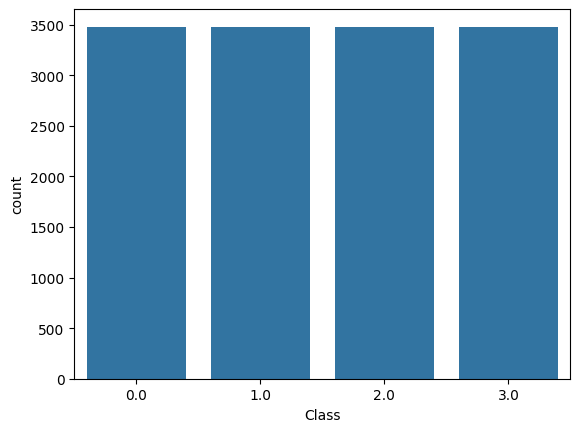

In [42]:
sns.countplot(data=new_data, x= y_sampled)

<Axes: >

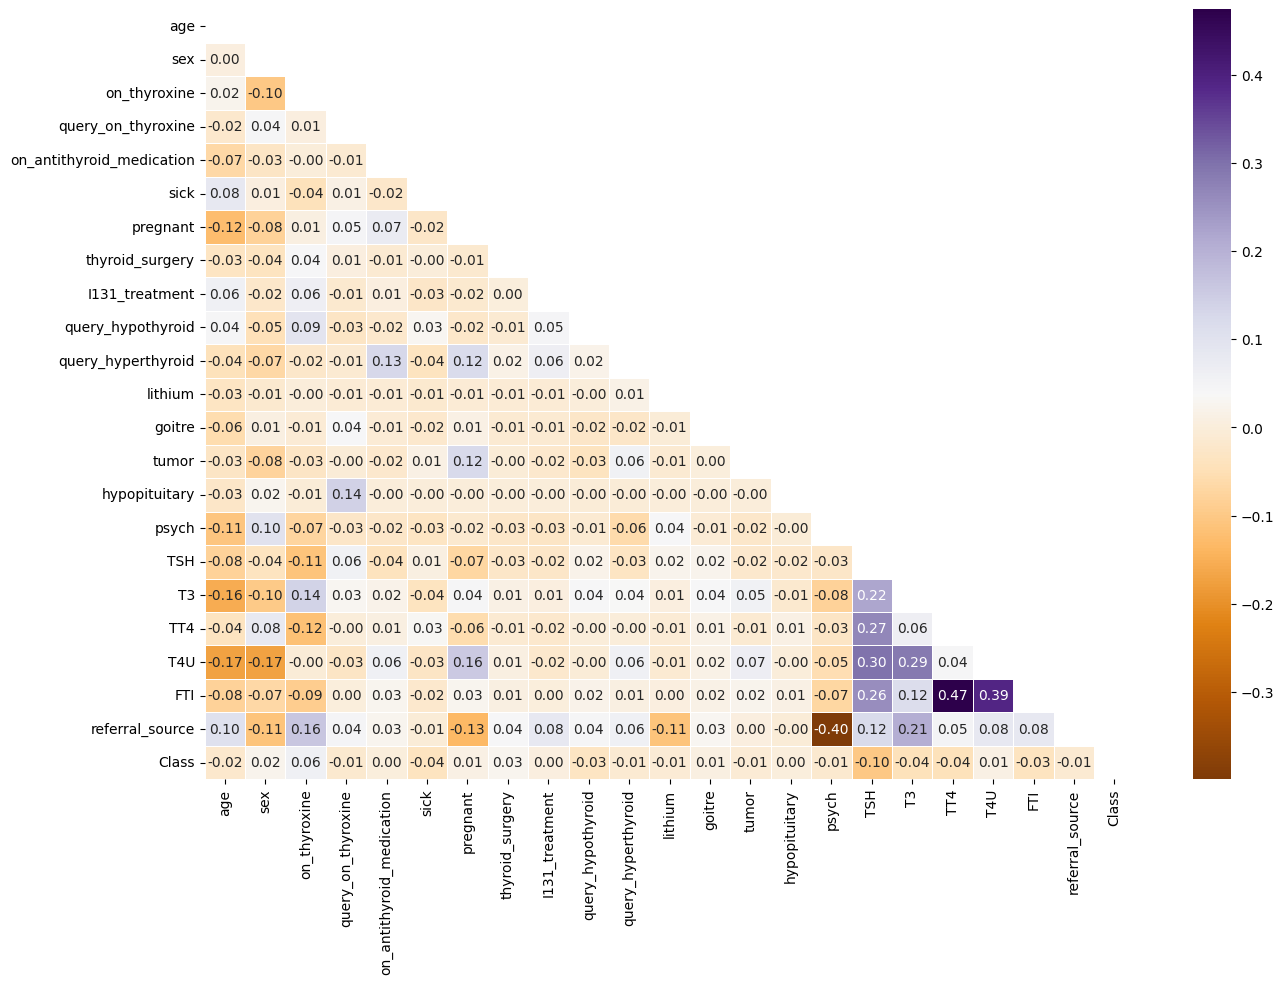

In [43]:
# Correlation Analysis Using Heatmap

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [44]:
#Splitting data into train and test for model building

X_train,X_test,y_train,y_test=train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=0)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# Ensure y_train is one-hot encoded
y_train_encoded = to_categorical(y_train)

# Function to build ANN models
def build_ann_model(layers, activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for units in layers:
        model.add(Dense(units, activation=activation))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Multi-class output layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [46]:
# Define MLP Model
def mlp_classifier(X_train, X_test, y_train, y_test):
    mlp_model = build_ann_model([64, 32])
    mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = mlp_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {mlp_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'

In [47]:
# Define FNN Model
def fnn_classifier(X_train, X_test, y_train, y_test):
    fnn_model = build_ann_model([128, 64, 32])
    fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = fnn_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {fnn_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'

In [48]:
# Define DNN Model
def dnn_classifier(X_train, X_test, y_train, y_test):
    dnn_model = build_ann_model([256, 128, 64, 32])
    dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))
    test_loss, test_acc = dnn_model.evaluate(X_test, y_test)
    return f'Accuracy_Score: {test_acc}\n Train Score: {dnn_model.evaluate(X_train, y_train)[1]}\n Test Score: {test_acc}'

In [49]:
# Define Autoencoder Model
def autoencoder_classifier(X_train, X_test, y_train, y_test):
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dense(64, activation='relu')(encoded)

    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')

    # Train Autoencoder
    autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, X_test))

    # Extract Encoder
    encoder = Model(input_layer, encoded)
    X_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)

    # Define Classifier with Correct Input Shape (64 Features)
    classifier = Sequential([
        Input(shape=(64,)),  # Adjusted input shape
        Dense(32, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
    ])

    classifier.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

    # Train Classifier
    classifier.fit(X_train_encoded, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_encoded, y_test))
    test_loss, test_acc = classifier.evaluate(X_test_encoded, y_test)

    return f'Accuracy_Score: {test_acc}\n Train Score: {classifier.evaluate(X_train_encoded, y_train)[1]}\n Test Score: {test_acc}'


In [50]:
# Define Different ANN Models
models = {
    "MLP": build_ann_model([64, 32]),
    "FNN": build_ann_model([128, 64, 32]),
    "DNN": build_ann_model([256, 128, 64, 32]),
    "Autoencoder": autoencoder_classifier  # Ensure autoencoder_classifier is defined
}

In [51]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample dataset for demonstration (adjust to your real dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# MLP Classifier
def mlp_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')  # 4 classes -> softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# FNN Classifier
def fnn_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# DNN Classifier
def dnn_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# Autoencoder Classifier
def autoencoder_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model.evaluate(X_test, y_test, verbose=0)

# Evaluation function
def print_score(X_train, X_test, y_train, y_test):
    print("MLP:\n")
    result0 = mlp_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result0[0], result0[1]))
    print("-" * 100)

    print("FNN:\n")
    result1 = fnn_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result1[0], result1[1]))
    print("-" * 100)

    print("DNN:\n")
    result2 = dnn_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result2[0], result2[1]))
    print("-" * 100)

    print("Autoencoder:\n")
    result3 = autoencoder_classifier(X_train, X_test, y_train, y_test)
    print("Loss: {:.4f}, Accuracy: {:.4f}".format(result3[0], result3[1]))
    print("-" * 100)

# Run all classifiers
print_score(X_train, X_test, y_train, y_test)


MLP:

Loss: 0.6817, Accuracy: 0.7367
----------------------------------------------------------------------------------------------------
FNN:

Loss: 0.5578, Accuracy: 0.8000
----------------------------------------------------------------------------------------------------
DNN:

Loss: 0.4769, Accuracy: 0.8267
----------------------------------------------------------------------------------------------------
Autoencoder:

Loss: 0.4245, Accuracy: 0.8000
----------------------------------------------------------------------------------------------------


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Sample dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Improved MLP Classifier
def improved_mlp_classifier(X_train, X_test, y_train, y_test):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(4, activation='softmax')  # 4 classes -> softmax activation
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Early stopping and learning rate adjustment
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stopping, lr_scheduler],
                        verbose=1)

    return model.evaluate(X_test, y_test, verbose=0)

# Evaluate the improved MLP
result = improved_mlp_classifier(X_train, X_test, y_train, y_test)
print("Improved MLP Classifier -> Loss: {:.4f}, Accuracy: {:.4f}".format(result[0], result[1]))


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2607 - loss: 1.8992 - val_accuracy: 0.4567 - val_loss: 1.2526 - learning_rate: 0.0010
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4197 - loss: 1.3780 - val_accuracy: 0.6133 - val_loss: 1.0971 - learning_rate: 0.0010
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5137 - loss: 1.1676 - val_accuracy: 0.6533 - val_loss: 1.0013 - learning_rate: 0.0010
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5146 - loss: 1.1962 - val_accuracy: 0.6567 - val_loss: 0.9248 - learning_rate: 0.0010
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6028 - loss: 1.0361 - val_accuracy: 0.6833 - val_loss: 0.8585 - learning_rate: 0.0010
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6211 - loss: 0.9773 - val_accuracy: 0.6900 - val_loss: 0.8086 - learning_rate: 0.0010
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5905 - loss: 1.0103 - v

In [ ]:
print(df.columns)  # Check actual column names


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')


In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/hypothyroid.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values  # Multi-class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model for Multi-Class
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(100, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)  # Convert probabilities to class labels

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:Adam ,Relu ,epoch:20 ,Batch:32")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique Classes: ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']
Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8871 - loss: 0.7279 - val_accuracy: 0.9232 - val_loss: 0.3156
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9246 - loss: 0.3002 - val_accuracy: 0.9232 - val_loss: 0.3008
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9142 - loss: 0.3145 - val_accuracy: 0.9232 - val_loss: 0.2688
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9221 - loss: 0.2718 - val_accuracy: 0.9232 - val_loss: 0.2675
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9191 - loss: 0.2718 - val_accuracy: 0.9232 - val_loss: 0.2685
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9221 - loss: 0.2654 - val_accuracy: 0.9245 - val_loss: 0.2539
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9253 - loss: 0.2444 - val_accuracy: 0.9285 - val_loss: 0.2470
Epoch 8/

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/hypothyroid.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values  # Multi-class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model with Leaky ReLU for Multi-Class
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(100),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dense(len(np.unique(y)), activation='softmax')  # Multi-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)  # Convert probabilities to class labels

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:Adam ,leakyRelu ,epoch:50 ,Batch:32")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique Classes: ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']
Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8672 - loss: 0.7689 - val_accuracy: 0.9232 - val_loss: 0.3154
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9233 - loss: 0.3097 - val_accuracy: 0.9232 - val_loss: 0.2884
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9225 - loss: 0.2882 - val_accuracy: 0.9232 - val_loss: 0.2687
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9169 - loss: 0.2865 - val_accuracy: 0.9232 - val_loss: 0.2616
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9325 - loss: 0.2448 - val_accuracy: 0.9219 - val_loss: 0.2590
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9226 - loss: 0.2631 - val_accuracy: 0.9205 - val_loss: 0.2573
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9273 - loss: 0.2389 - val_accuracy: 0.9232 - val_loss: 0.2569
Epoch 8/5

In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/hypothyroid.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model with Leaky ReLU and Dropout for Multi-Class
model = Sequential([
    LSTM(120, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(60),
    Dropout(0.4),
    Dense(150),
    LeakyReLU(alpha=0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train Model
history = model.fit(X_train, y_train, epochs=75, batch_size=128, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:RMSprop ,leakyRelu ,epoch:75 ,Batch:128")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique Classes: ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']
Epoch 1/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8191 - loss: 0.8360 - val_accuracy: 0.9232 - val_loss: 0.3324
Epoch 2/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9249 - loss: 0.3301 - val_accuracy: 0.9232 - val_loss: 0.3207
Epoch 3/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9181 - loss: 0.3499 - val_accuracy: 0.9232 - val_loss: 0.3187
Epoch 4/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.9217 - loss: 0.3338 - val_accuracy: 0.9232 - val_loss: 0.3222
Epoch 5/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9171 - loss: 0.3383 - val_accuracy: 0.9232 - val_loss: 0.3293
Epoch 6/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9229 - loss: 0.3157 - val_accuracy: 0.9232 - val_loss: 0.2917
Epoch 7/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9245 - loss: 0.2849 - val_accuracy: 0.9232 - val_loss: 0.2901
Ep

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/hypothyroid.csv"  # Change path if needed
df = pd.read_csv(file_path)

# Check unique values in "Class" column
print("Unique Classes:", df["Class"].unique())

# Preprocessing
df.replace("?", np.nan, inplace=True)
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = df.columns[2:28]
df[binary_cols] = df[binary_cols].replace({"t": 1, "f": 0})
df["sex"] = df["sex"].replace({"F": 0, "M": 1})

# Encode multi-class labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

df.drop(columns=["referral_source", "TBG"], inplace=True)
df.fillna(df.median(), inplace=True)

# Train-test split
X = df.drop(columns=["Class"]).values
y = df["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define MLP + LSTM Model with Leaky ReLU and Dropout for Multi-Class
model = Sequential([
    LSTM(120, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(60),
    Dropout(0.4),
    Dense(150),
    LeakyReLU(alpha=0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=75, batch_size=128, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test).argmax(axis=1)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print("model:Adam ,leakyRelu ,epoch:75 ,Batch:128")
print(f"MLP + LSTM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Unique Classes: ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']
Epoch 1/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8213 - loss: 1.0691 - val_accuracy: 0.9232 - val_loss: 0.3358
Epoch 2/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9224 - loss: 0.3532 - val_accuracy: 0.9232 - val_loss: 0.3226
Epoch 3/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9257 - loss: 0.3216 - val_accuracy: 0.9232 - val_loss: 0.3155
Epoch 4/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.9257 - loss: 0.3121 - val_accuracy: 0.9232 - val_loss: 0.3022
Epoch 5/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.9273 - loss: 0.2970 - val_accuracy: 0.9232 - val_loss: 0.2892
Epoch 6/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.9224 - loss: 0.2903 - val_accuracy: 0.9232 - val_loss: 0.2748
Epoch 7/75
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9209 - loss: 0.2862 - val_accuracy: 0.9232 - val_loss: 0.2674
Ep